In [1]:
import ROOT as r
import numpy as np

Welcome to JupyROOT 6.26/02


In [2]:
import Cnn_toolr

In [3]:
# データの読み込み
nd_x = []
nd_label = []
nd_output = []

for i in range(1, 6):
    nd_x.append(np.load(f"./data_{i*2+10}GeV/Conv3Ds_result/x1.npy"))
    nd_label.append(np.load(f"./data_{i*2+10}GeV/Conv3Ds_result/y_label1.npy"))
    nd_output.append(np.load(f"./data_{i*2+10}GeV/Conv3Ds_result/y_output1.npy"))

nd_x = np.array(nd_x)
nd_label = np.array(nd_label)
nd_output = np.array(nd_output)
print(nd_x.shape, nd_label.shape, nd_output.shape)

(5, 4000, 1, 30, 30, 48) (5, 4000) (5, 4000)


Warning in <TROOT::Append>: Replacing existing TH1: CNN output #pi^{0} (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #gamma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #pi^{0} (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #gamma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #pi^{0} (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #gamma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #pi^{0} (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CNN output #gamma (Potential memory leak).


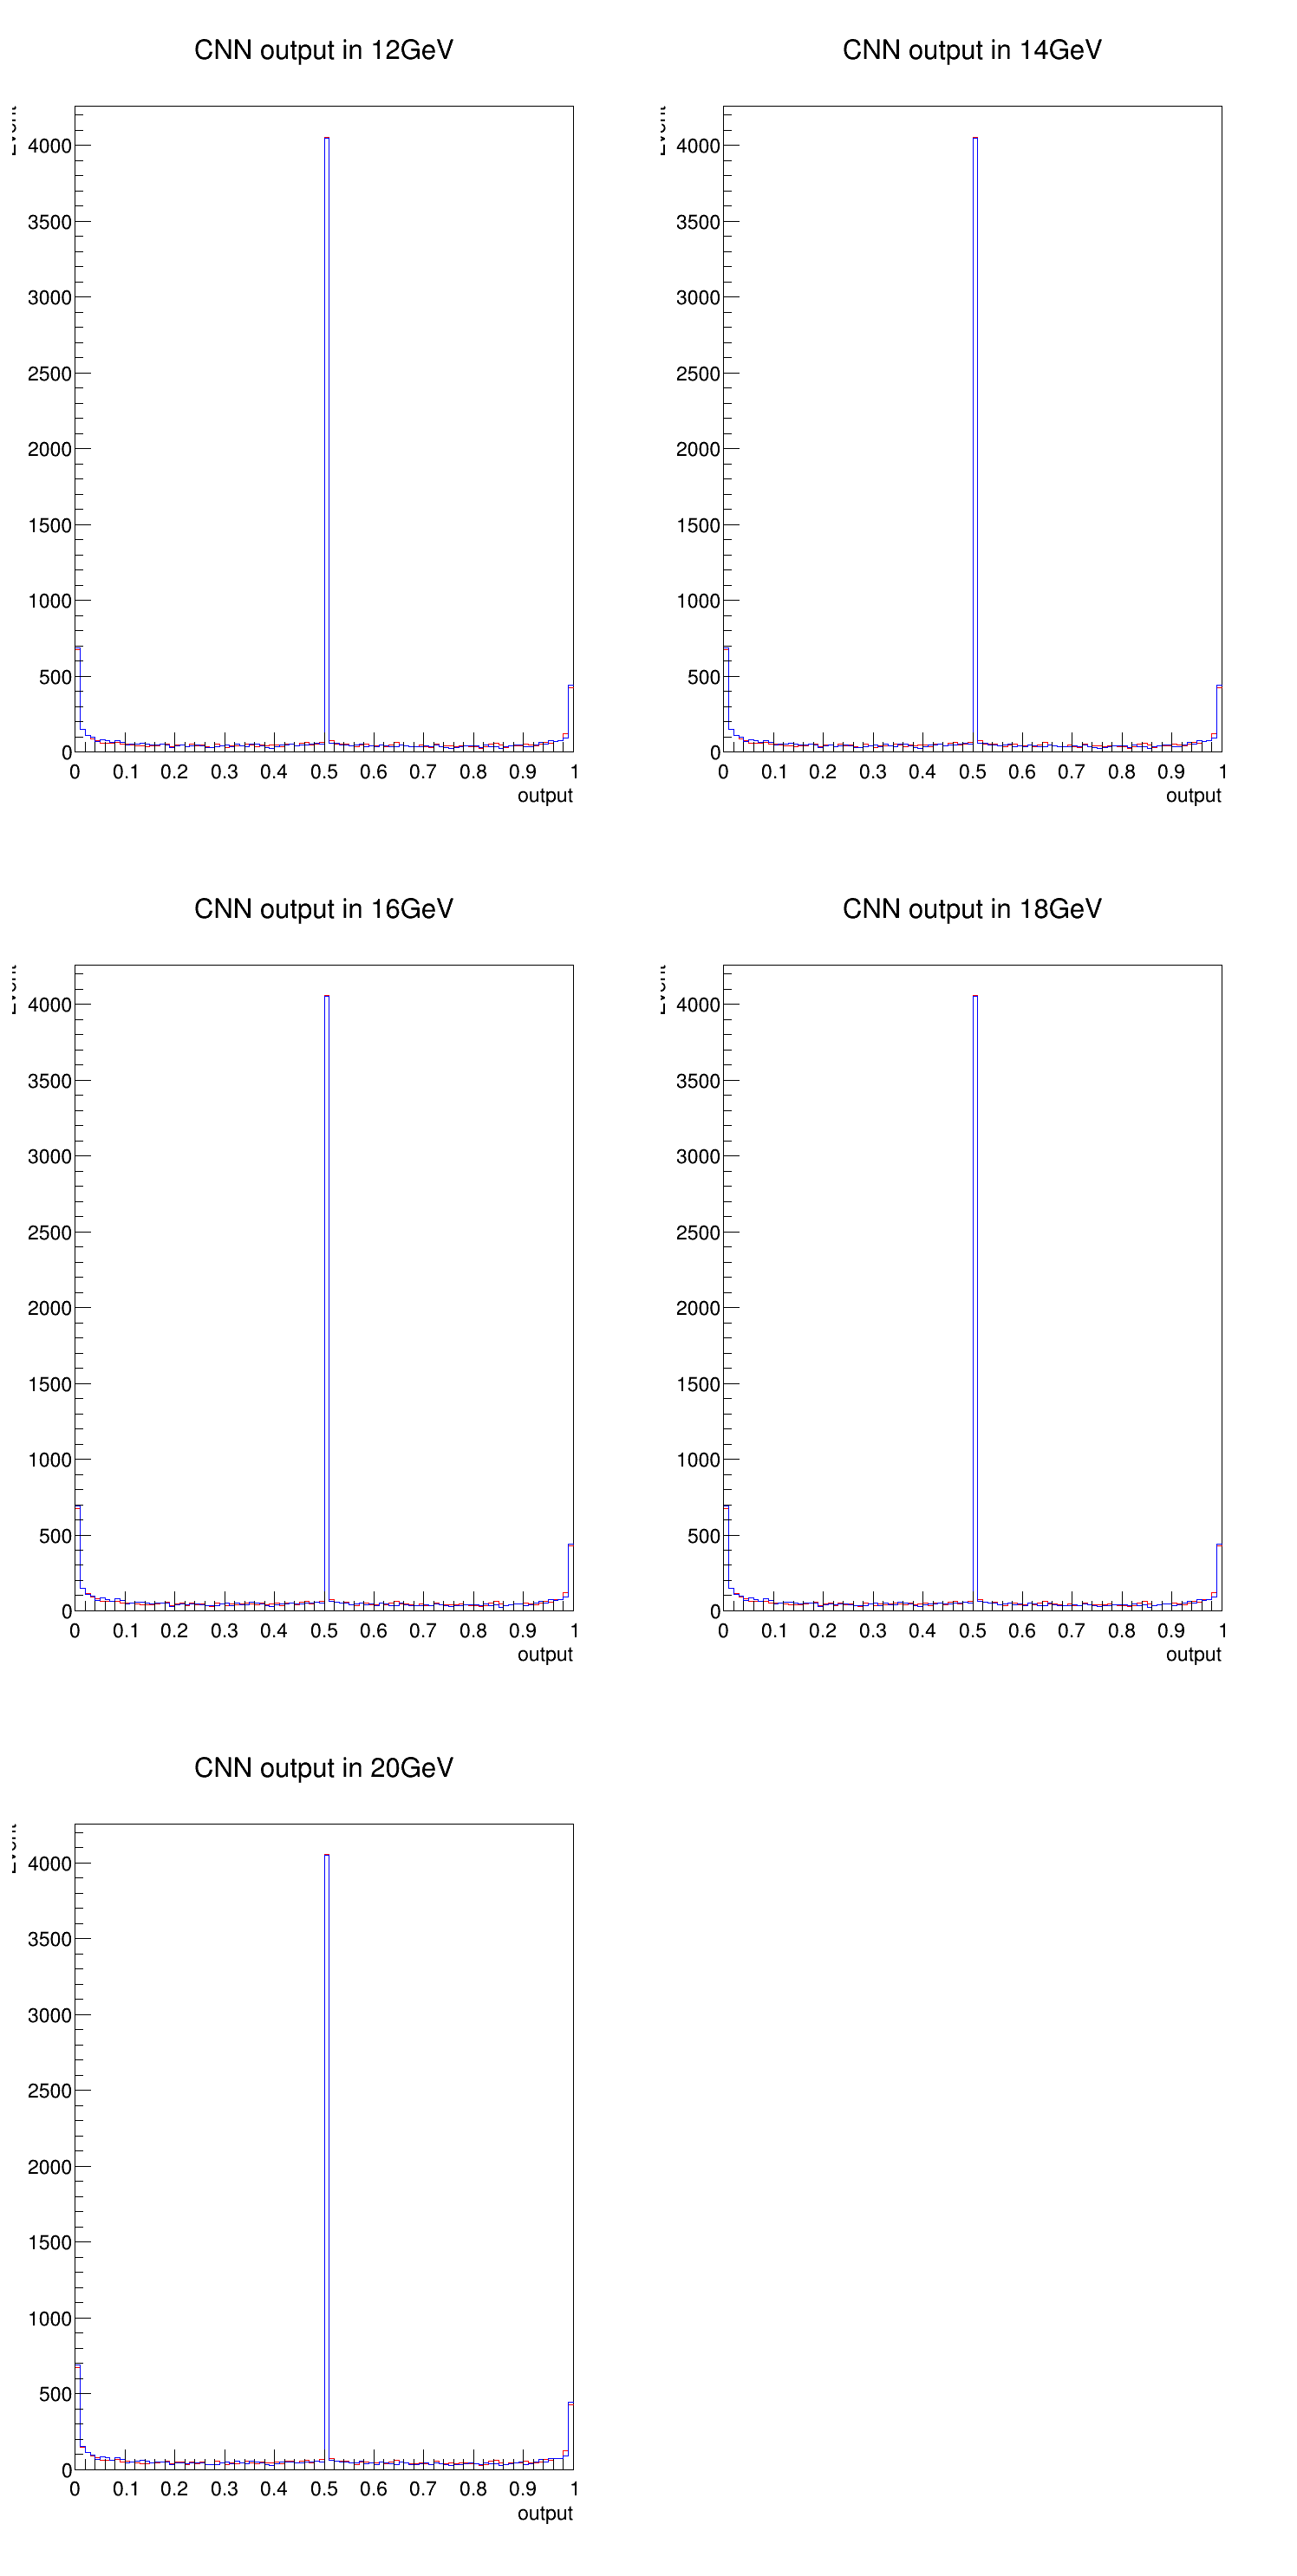

In [4]:
# 各EnergyでのCNNoutputのヒストグラム
histoname_pi0 = "CNN output #pi^{0}"
histoname_gamma = "CNN output #gamma"
draw_op = "HIST nostack"
output_mean_pi0 = []
output_mean_gamma = []
output_meanerror_pi0 = []
output_meanerror_gamma = []
for i in  range(0, 5):
    output_pi0 = nd_output[nd_label==1]
    output_gamma = nd_output[nd_label==0]
    histolabel_pi0 = f"CNN output pi0 in {(i+1)*2+10}GeV"
    histolabel_gamma = f"CNN output gamma in {(i+1)*2+10}GeV"
    stackname = f"hs_cnnout_{(i+1)*2+10}"
    stacklabel = f"CNN output in {(i+1)*2+10}GeV;output;Event"
    exec(f"hs_cnnout_{(i+1)*2+10} = r.THStack(stackname, stacklabel)")
    h1_pi0 = r.TH1D(histoname_pi0, f"CNN output pi0 in {(i+1)*2+10}GeV", 100, 0, 1)
    h1_gamma = r.TH1D(histoname_gamma, f"CNN output gamma in {(i+1)*2+10}GeV", 100, 0, 1)
    h1_pi0.FillN(len(output_pi0), output_pi0.astype(np.double), np.ones(len(output_pi0)))
    h1_gamma.FillN(len(output_gamma), output_gamma.astype(np.double), np.ones(len(output_gamma)))
    h1_pi0.SetLineColor(2)
    h1_gamma.SetLineColor(4)
    output_mean_pi0.append(h1_pi0.GetMean())
    output_mean_gamma.append(h1_gamma.GetMean())
    output_meanerror_pi0.append(h1_pi0.GetMeanError())
    output_meanerror_gamma.append(h1_gamma.GetMeanError())
    exec(f"hs_cnnout_{(i+1)*2+10}.Add(h1_pi0)")
    exec(f"hs_cnnout_{(i+1)*2+10}.Add(h1_gamma)")
c_cnnout = r.TCanvas("CNN output", "CNN output", 1500, 3000)
c_cnnout.Divide(2, 3)
for i in range(1, 6):
    c_cnnout.cd(i)
    exec(f"hs_cnnout_{i*2+10}.Draw(draw_op)")
c_cnnout.Draw()

In [5]:
output_mean_gamma = np.array(output_mean_gamma)
output_mean_pi0 = np.array(output_mean_pi0)
output_meanerror_gamma = np.array(output_meanerror_gamma)
output_meanerror_pi0 = np.array(output_meanerror_pi0)
print(output_mean_gamma, output_meanerror_gamma)
print(output_mean_pi0, output_meanerror_pi0)

[0.47139005 0.47139005 0.47139005 0.47139005 0.47139005] [0.00272015 0.00272015 0.00272015 0.00272015 0.00272015]
[0.47979476 0.47979476 0.47979476 0.47979476 0.47979476] [0.00267896 0.00267896 0.00267896 0.00267896 0.00267896]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: CNN output


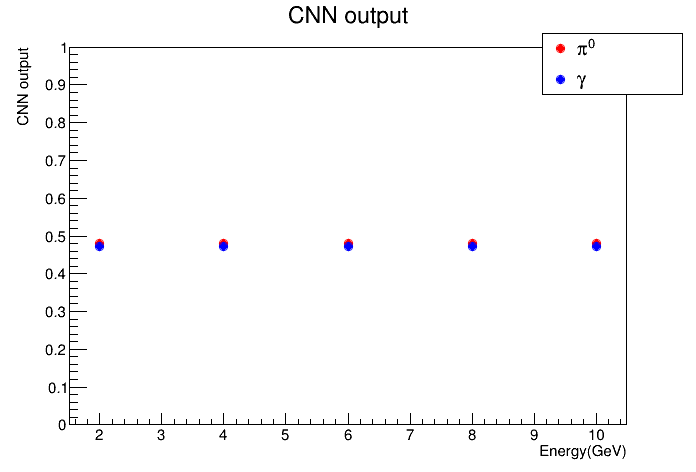

In [6]:
c_output_g = r.TCanvas("CNN output")
tmg_output = r.TMultiGraph("tmg_output", "CNN output; Energy(GeV); CNN output")
leg_output = r.TLegend(0.78, 0.80, 0.98, 0.93)
tge_output_pi0 = r.TGraphErrors(
    len(output_mean_pi0),
    (np.arange(1, 6)*2).astype(np.float32),
    output_mean_pi0.astype(np.float32),
    np.zeros(len(output_mean_pi0)).astype(np.float32),
    output_meanerror_pi0.astype(np.float32)
    )
tge_output_pi0.SetMarkerSize(1)
tge_output_pi0.SetMarkerColor(2)
tge_output_pi0.SetMarkerStyle(20)
leg_output.AddEntry(tge_output_pi0, "#pi^{0}", "P")
tmg_output.Add(tge_output_pi0)
tge_output_gamma = r.TGraphErrors(
    len(output_mean_gamma),
    (np.arange(1, 6)*2).astype(np.float32),
    output_mean_gamma.astype(np.float32),
    np.zeros(len(output_mean_gamma)).astype(np.float32),
    output_meanerror_gamma.astype(np.float32)
    )
tge_output_gamma.SetMarkerSize(1)
tge_output_gamma.SetMarkerColor(4)
tge_output_gamma.SetMarkerStyle(20)
leg_output.AddEntry(tge_output_gamma, "#gamma", "P")
tmg_output.Add(tge_output_gamma)
tmg_output.GetYaxis().SetRangeUser(0, 1)
tmg_output.GetXaxis().SetRangeUser(1, 11)
tmg_output.Draw("AP")
leg_output.Draw()
c_output_g.Draw()

In [7]:
accuracy_list = []
for i in range(5):
    accuracy_list.append(Cnn_toolr.cnn_ana_r.test_accuracy(nd_output[i], nd_label[i]))
accuracy_list = np.array(accuracy_list)
print(accuracy_list)

[0.508   0.50625 0.51275 0.49875 0.5005 ]


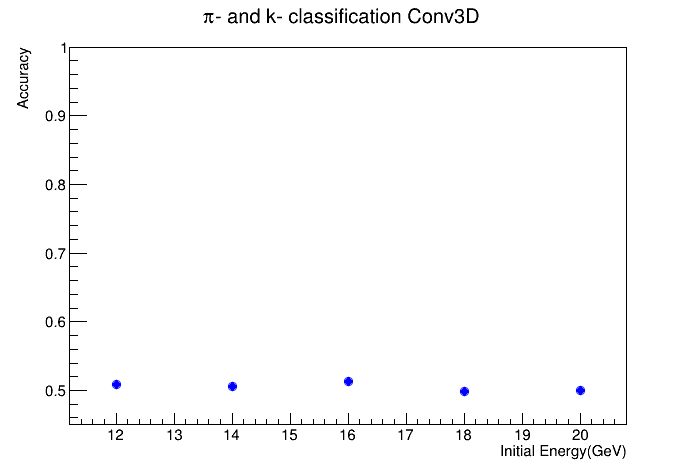

In [8]:
c_accuracy_g = r.TCanvas("accuracy graph")
tg_accuracy = r.TGraph(len(accuracy_list), (np.arange(1, 6)*2+10).astype(np.float32), accuracy_list.astype(np.float32))
tg_accuracy.SetMarkerSize(1)
tg_accuracy.SetMarkerColor(4)
tg_accuracy.SetMarkerStyle(20)
tg_accuracy.SetTitle("#pi- and k- classification Conv3D")
tg_accuracy.GetXaxis().SetTitle("Initial Energy(GeV)")
tg_accuracy.GetYaxis().SetTitle("Accuracy")
tg_accuracy.GetYaxis().SetRangeUser(0.45, 1)
tg_accuracy.Draw("AP")
c_accuracy_g.Draw()